In [10]:
from minisom import MiniSom
import numpy as np
import random
import os
import cv2

In [11]:
data_path = 'dataset/train'
X_train = []

for file_name in os.listdir(data_path):
    file_path = os.path.join(data_path, file_name)
    img = cv2.imread(file_path)
    if img is not None:
        X_train.append(img)
    else:
        print(f"Failed to read image: {file_name}")

X_train = np.array(X_train)
print(f"Loaded {len(X_train)} images into X_train.")


Loaded 40 images into X_train.


In [14]:
# Load images from dataset/train
data_path = 'dataset/train'
X_train = []

for file_name in os.listdir(data_path):
    file_path = os.path.join(data_path, file_name)
    img = cv2.imread(file_path)
    if img is not None:
        X_train.append(img.flatten())  # Flatten the image to a 1D array
    else:
        print(f"Failed to read image: {file_name}")

X_train = np.array(X_train)

# Create a Kohonen map
som = MiniSom(10, 10, len(X_train[0]), sigma=0.3, learning_rate=0.5)

# Initialize the weights of the neurons
som.random_weights_init(X_train)

# Train the Kohonen map
som.train_random(X_train, 1000)


In [15]:
# Segment the dataset
segmented_data = np.array([som.winner(x) for x in X_train])


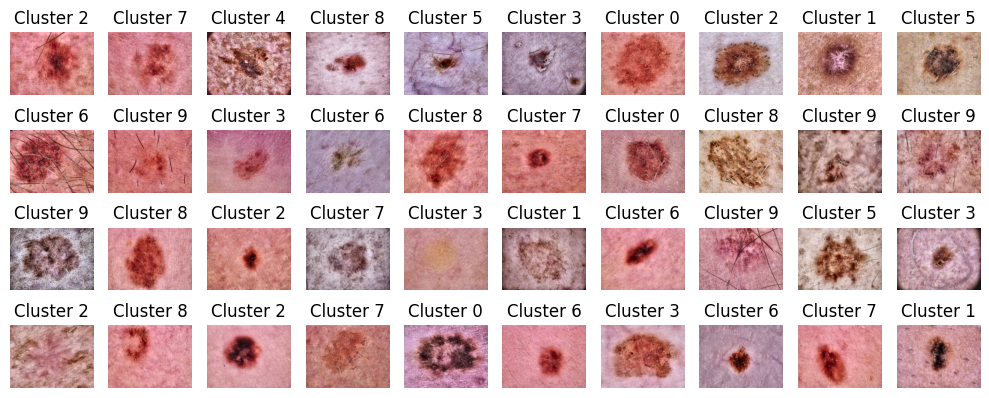

In [17]:
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(10, 10))
for i, (x, _) in enumerate(zip(X_train, segmented_data)):
    x_rgb = cv2.cvtColor(x.reshape(450, 600, 3), cv2.COLOR_BGR2RGB)
    plt.subplot(10, 10, i + 1)
    plt.imshow(x_rgb)
    plt.title(f'Cluster {_[0]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


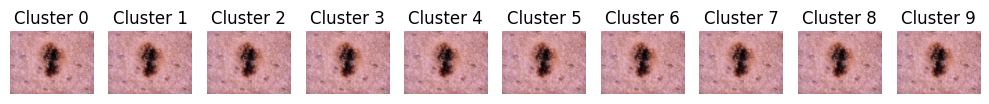

In [19]:
# Calculate the average color of images in each cluster
cluster_avg_colors = {}
for i, (_, cluster) in enumerate(segmented_data):
    if cluster not in cluster_avg_colors:
        cluster_avg_colors[cluster] = []
    cluster_avg_colors[cluster].append(X_train[i])

# Compute the average color for each cluster
average_colors = {}
for cluster, images in cluster_avg_colors.items():
    average_color = np.mean(images, axis=0)
    average_colors[cluster] = average_color

# Visualize the average colors
plt.figure(figsize=(10, 5))
for cluster, avg_color in average_colors.items():
    plt.subplot(1, len(average_colors), cluster + 1)
    plt.imshow(avg_color.reshape(450, 600, 3) / 255)  # Assuming BGR format, divide by 255 to scale to [0, 1]
    plt.imshow(x_rgb)
    plt.title(f'Cluster {cluster}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [20]:
# Initialize an empty array to store the segmented masks
segmented_masks = []

# For each image in your dataset
for x in X_train:
    # Find the winning neuron for each pixel in the flattened image
    winners = np.array([som.winner(x) for x in X_train])

    # Reshape the winning neuron indices back into the shape of the original image
    segmented_mask = np.zeros((450, 600))  # Assuming original image shape is (450, 600, 3)
    for i, winner in enumerate(winners):
        segmented_mask[i // 600, i % 600] = winner[0]  # Assign the cluster number to each pixel

    segmented_masks.append(segmented_mask)

# Convert the list of segmented masks to a numpy array
segmented_masks = np.array(segmented_masks)


ValueError: cannot reshape array of size 2 into shape (450,600)

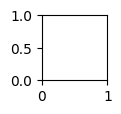

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (x, _) in enumerate(zip(X_train, segmented_data)):
    plt.subplot(10, 10, i + 1)
    plt.imshow(_.reshape(450, 600), cmap='viridis')  # Assuming the segmentation result is a 2D array
    plt.title(f'Cluster {_[0]}')
    plt.axis('off')
plt.tight_layout()
plt.show()
